<a href="https://colab.research.google.com/github/fourfeatherz/DS2002F24/blob/main/Labs%5CUniversities_and_Stock_API_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using API Calls in Python with JSON and DataFrames - University Data Example
In this notebook, we will make API requests to the Hipolabs Universities API, parse the JSON response, and convert it into Pandas DataFrames for analysis and visualization.

### Step 1: Making the API Call to Fetch University Data

In [1]:
import requests
import json
import pandas as pd

# API endpoint for fetching universities
url = "http://universities.hipolabs.com/search?country=United%20States"

# Make the GET request
response = requests.get(url)

# Check the status code
if response.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")

API request successful!


### Step 2: Parsing the JSON Response

In [2]:
# Parse the JSON response
university_data = response.json()

# Pretty-print the first university
print(json.dumps(university_data[0], indent=2))

{
  "name": "Marywood University",
  "alpha_two_code": "US",
  "web_pages": [
    "http://www.marywood.edu"
  ],
  "state-province": null,
  "domains": [
    "marywood.edu"
  ],
  "country": "United States"
}


### Step 3: Converting the JSON Data to a DataFrame

In [3]:
# Convert JSON data to a DataFrame
df = pd.DataFrame(university_data)

# Display the first few rows of the DataFrame
print(df.head())
df

                                    name alpha_two_code  \
0                    Marywood University             US   
1                  Lindenwood University             US   
2                    Sullivan University             US   
3  Florida State College at Jacksonville             US   
4                      Xavier University             US   

                      web_pages state-province           domains  \
0     [http://www.marywood.edu]           None    [marywood.edu]   
1  [http://www.lindenwood.edu/]           None  [lindenwood.edu]   
2       [https://sullivan.edu/]           None    [sullivan.edu]   
3       [https://www.fscj.edu/]           None        [fscj.edu]   
4     [https://www.xavier.edu/]           None      [xavier.edu]   

         country  
0  United States  
1  United States  
2  United States  
3  United States  
4  United States  


,name,alpha_two_code,web_pages,state-province,domains,country
0,Marywood University,US,[http://www.marywood.edu],None,[marywood.edu],United States
1,Lindenwood University,US,[http://www.lindenwood.edu/],None,[lindenwood.edu],United States
2,Sullivan University,US,[https://sullivan.edu/],None,[sullivan.edu],United States
3,Florida State College at Jacksonville,US,[https://www.fscj.edu/],None,[fscj.edu],United States
4,Xavier University,US,[https://www.xavier.edu/],None,[xavier.edu],United States
...,...,...,...,...,...,...
2330,Western Nevada College,US,[https://wnc.edu/],None,[wnc.edu],United States
2331,Western University of Health Sciences,US,[https://www.westernu.edu/],None,[westernu.edu],United States
2332,St. Mary's University,US,[https://www.stmarytx.edu/],Texas,[stmarytx.edu],United States
2333,South Florida State College,US,[https://www.southflorida.edu/],Florida,[southflorida.edu],United States


### Step 4: Basic Data Analysis

In [4]:
# Count the number of universities by state
state_counts = df['state-province'].value_counts()
print(state_counts)

state-province
Pennsylvania            32
NY                       9
California               5
Texas                    5
New York, NY             4
New York                 3
Florida                  3
North Carolina           3
Michigan                 3
Ohio                     3
Illinois                 2
CA                       2
Washington               2
GA                       2
TX                       2
ND                       1
Missouri                 1
Maine                    1
MA                       1
Georgia                  1
MI                       1
New Hampshire            1
Virginia                 1
South Carolina           1
IN                       1
Colorado                 1
Kansas                   1
Indiana                  1
VA                       1
Iowa                     1
NV                       1
Utah                     1
Salt Lake City, Utah     1
Name: count, dtype: int64


### Step 5: Data Visualization

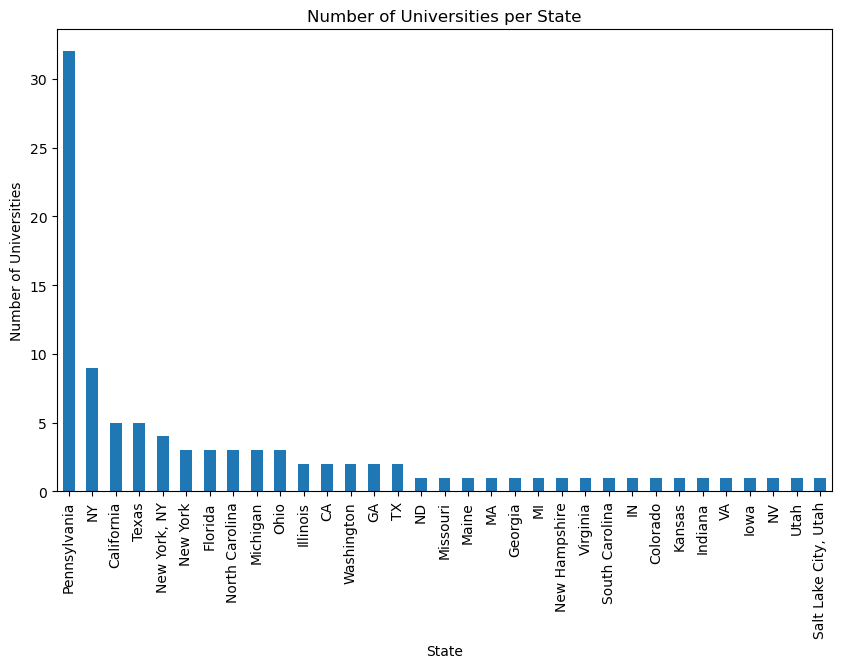

In [5]:
import matplotlib.pyplot as plt

# Plot the number of universities per state
state_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Universities per State")
plt.xlabel("State")
plt.ylabel("Number of Universities")
plt.show()

### Step 6: Extending to Multiple Countries

In [6]:
countries = ["United States", "Canada", "Australia", "United Kingdom"]
university_list = []

for country in countries:
    response = requests.get(f"http://universities.hipolabs.com/search?country={country}")
    data = response.json()

    for uni in data:
        uni['country'] = country
        university_list.append(uni)

# Convert to DataFrame
df_universities = pd.DataFrame(university_list)

# Display the first few rows
print(df_universities.head())

                                    name alpha_two_code  \
0                    Marywood University             US   
1                  Lindenwood University             US   
2                    Sullivan University             US   
3  Florida State College at Jacksonville             US   
4                      Xavier University             US   

                      web_pages state-province           domains  \
0     [http://www.marywood.edu]           None    [marywood.edu]   
1  [http://www.lindenwood.edu/]           None  [lindenwood.edu]   
2       [https://sullivan.edu/]           None    [sullivan.edu]   
3       [https://www.fscj.edu/]           None        [fscj.edu]   
4     [https://www.xavier.edu/]           None      [xavier.edu]   

         country  
0  United States  
1  United States  
2  United States  
3  United States  
4  United States  


### Step 7: Visualizing University Counts by Country

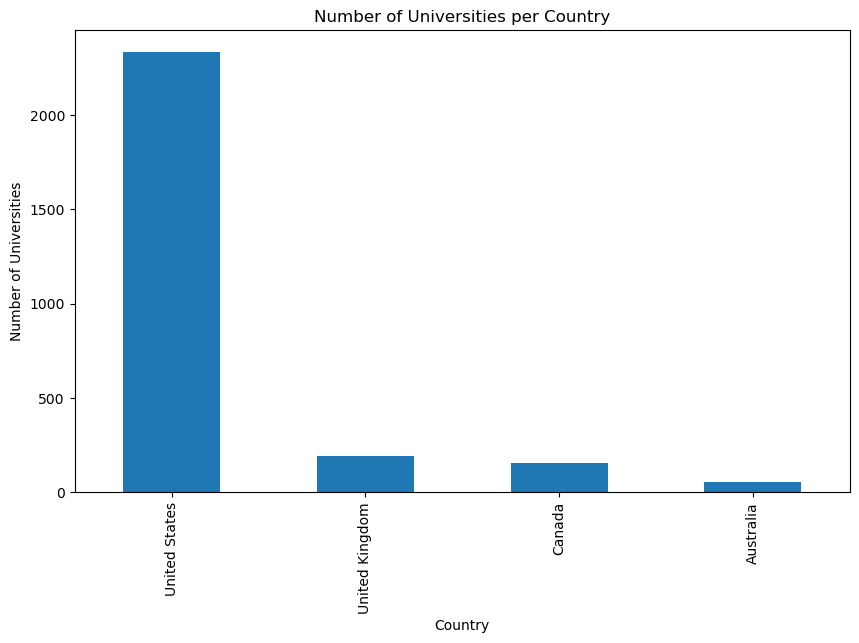

In [7]:
# Count the number of universities per country
country_counts = df_universities['country'].value_counts()

# Plot the data
country_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Universities per Country")
plt.xlabel("Country")
plt.ylabel("Number of Universities")
plt.show()

###Step 8: Customizing the Workshop

You can experiment further by:



*   Fetching data for specific regions.
*   Analyzing other attributes such as university domains.
*   Creating visualizations to compare universities in different regions.



For the followig you will need to get your API key from  https://financeapi.net/
Examine the demo page and sample data to be returned

In [8]:
import json
import pandas as pd
import json
import requests


import os
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
#get stock from the user
stock=input("Which stock would you like to research? (Enter the symbol; Ex. AAPL for Apple)")

Which stock would you like to research? (Enter the symbol; Ex. AAPL for Apple) AAPL


In [10]:
print("The Stock we will research is:" + stock)

The Stock we will research is:AAPL


In [11]:
apikey=os.getenv("API_KEY")

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","typeDisp":"Equity","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"customPriceAlertConfidence":"HIGH","currency":"USD","exchange":"NMS","shortName":"Apple Inc.","longName":"Apple Inc.","messageBoardId":"finmb_24937","exchangeTimezoneName":"America/New_York","exchangeTimezoneShortName":"EDT","gmtOffSetMilliseconds":-14400000,"market":"us_market","esgPopulated":false,"regularMarketChangePercent":0.6297854,"regularMarketPrice":236.48,"hasPrePostMarketData":true,"firstTradeDateMilliseconds":345479400000,"priceHint":2,"postMarketChangePercent":0.0190283,"postMarketTime":1729555194,"postMarketPrice":236.525,"postMarketChange":0.0449982,"regularMarketChange":1.4799957,"regularMarketTime":1729540801,"regularMarketDayHigh":236.85,"regularMarketDayRange":"234.45 - 236.85","regularMarketDayLow":234.45,"regularMarketVolume":35059099,"regularMarketPreviousClose":235.0,"bid":0.0,"ask":0.0,"bidSize":0,"

In [12]:
#print the company name and price
stock_json = response.json()
print(stock_json['quoteResponse']['result'][0]["longName"] + " Price: $" + str(stock_json['quoteResponse']['result'][0]["regularMarketPrice"]))

Apple Inc. Price: $236.48


Ask the user for a list of stocks and pass that answer back to the user


In [35]:
stocks = input("Give a list of stocks you would like to research (Enter the symbols, separated by comma (no spaces)): ").upper()

apikey=os.getenv("API_KEY")

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stocks}
# print(querystring)

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)
json_stocks = response.json()
# print(response.text)

# for stocks = input("Give a list of stocks you would like to research (Enter the symbols, separated by comma (no spaces)): ")

apikey=os.getenv("API_KEY")

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stocks}
# print(querystring)

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)
json_stocks = response.json()

for i in range(len(json_stocks['quoteResponse']['result'])):
    print(json_stocks['quoteResponse']['result'][i]["longName"] + " Price: $" + str(json_stocks['quoteResponse']['result'][i]["regularMarketPrice"]))

Give a list of stocks you would like to research (Enter the symbols, separated by comma (no spaces)):  AAPL,GOOG,AMZN


Apple Inc. Price: $236.48
Alphabet Inc. Price: $165.8
Amazon.com, Inc. Price: $189.07
